# Are people a good judge of their own sleep and health?
***
## BMI As It Pertains to Perception of Health

# Set Up
## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Parameters

In [2]:
clean_2013_POLLDATASET = '../data_file/cleaned_data_csv/clean_2013_POLLDATASET.csv'


## Loading Cleaned Dataset

In [3]:
clean_2013Poll = pd.read_csv(clean_2013_POLLDATASET)
clean_2013Poll.shape

(1000, 140)

In [4]:
bmi_df = clean_2013Poll.copy()

In [5]:
bmi_df.shape

(1000, 140)

In [6]:
bmi_df['bmi'].max()

53.36

In [7]:
bmi_df

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,marital_status,education_level,annual_household_income,hispanic,race,bed_time_weekend_wrong,wake_up_weekend_wrong,total_height_inch,bmi,regions
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,single,Highschool,Less than $25k,2,White/Caucasian,1000.0,2050.0,73.0,20.98,West
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,married_or_partnered,Bachelor's Degree,Over $100k,2,White/Caucasian,2100.0,2100.0,69.0,34.70,South
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,separated,Associate's Degree,$25k-$50k,2,White/Caucasian,1000.0,1900.0,74.0,25.03,West
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,single,Master's Degree,Refused,2,White/Caucasian,1100.0,2000.0,71.0,NaN,South
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,married_or_partnered,Some College,Over $100k,2,White/Caucasian,1100.0,2050.0,69.0,22.89,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,956,43,2,Female,NY,18,15,1100.0,2000.0,900.0,...,married_or_partnered,Some College,$50k-$75k,2,White/Caucasian,1100.0,2000.0,64.0,19.39,Northeast
996,959,26,1,Male,NY,2,13,1201.7,1950.0,748.3,...,married_or_partnered,Master's Degree,Less than $25k,2,White/Caucasian,1400.0,2200.0,63.0,23.03,Northeast
997,963,45,1,Female,NY,18,11,1100.0,1900.0,800.0,...,married_or_partnered,Master's Degree,$75k-$100k,2,White/Caucasian,1200.0,2050.0,67.0,22.86,Northeast
998,964,53,1,Male,NE,16,7,1050.0,1800.0,750.0,...,married_or_partnered,Highschool,$50k-$75k,2,White/Caucasian,1050.0,1900.0,70.0,30.13,Midwest


In [8]:
bmi_df = bmi_df[['weight_lbs','total_height_inch','bmi']]

In [9]:

bmi_df.drop(bmi_df[bmi_df.weight_lbs > 900].index, inplace=True)
bmi_df.dropna(subset = ["total_height_inch"], inplace=True)


C:\Users\blake\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\blake\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
bmi_df

,weight_lbs,total_height_inch,bmi
0,159,73.0,20.98
1,235,69.0,34.70
2,195,74.0,25.03
4,155,69.0,22.89
5,144,66.0,23.24
...,...,...,...
995,113,64.0,19.39
996,130,63.0,23.03
997,146,67.0,22.86
998,210,70.0,30.13


In [11]:

bmi_df['bmi_range'] = pd.cut(bmi_df['bmi'], [0, 18.4, 24.9, 29.9, 55],
                       labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

C:\Users\blake\AppData\Local\Temp/ipykernel_2128/849956211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_df['bmi_range'] = pd.cut(bmi_df['bmi'], [0, 18.4, 24.9, 29.9, 55],


In [12]:
# bmi_df.bmi_bin.value_counts()

In [13]:
bmi_df

,weight_lbs,total_height_inch,bmi,bmi_range
0,159,73.0,20.98,Normal
1,235,69.0,34.70,Obese
2,195,74.0,25.03,Overweight
4,155,69.0,22.89,Normal
5,144,66.0,23.24,Normal
...,...,...,...,...
995,113,64.0,19.39,Normal
996,130,63.0,23.03,Normal
997,146,67.0,22.86,Normal
998,210,70.0,30.13,Obese


## BMI Scatter Plot

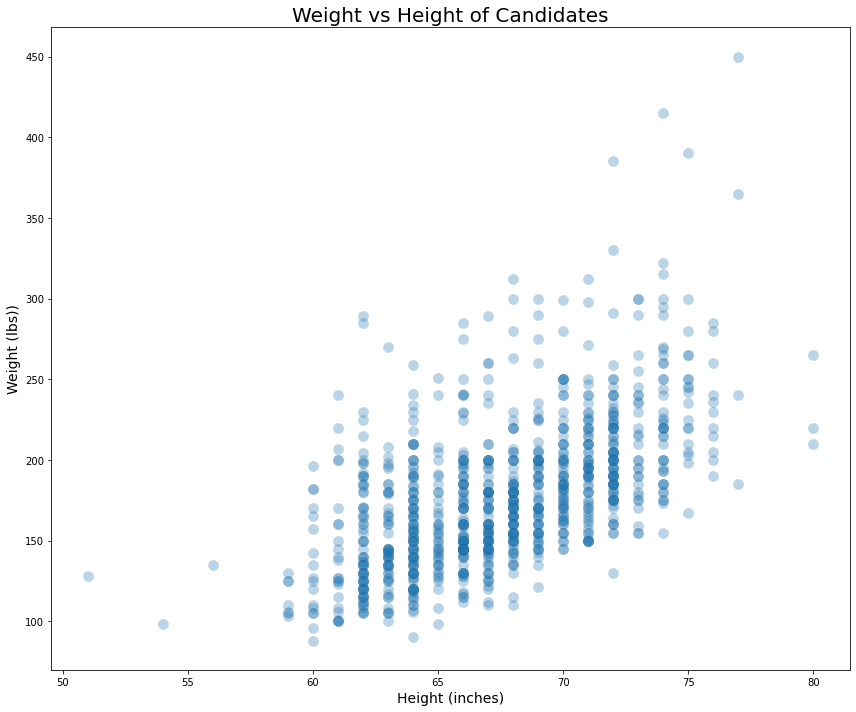

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))

g = ax.scatter(
    'total_height_inch','weight_lbs',data=bmi_df,

    s = 110,
    lw=.1, edgecolor='k', alpha=.3
)

ax.set_xlabel('Height (inches)', fontsize = 14)
ax.set_ylabel('Weight (lbs))', fontsize = 14)
ax.set_title('Weight vs Height of Candidates', fontsize = 20)

fig.tight_layout()


## Categorical BMI Scatter Plot

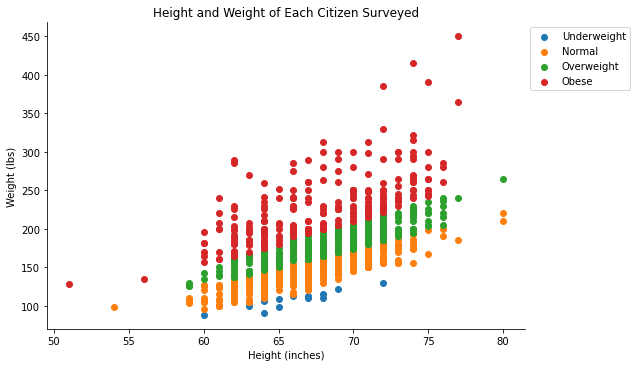

In [15]:
fg = sns.FacetGrid(data=bmi_df, hue='bmi_range', height=5, aspect=1.5)
fg.map(plt.scatter, 'total_height_inch','weight_lbs').set(title='Height and Weight of Each Citizen Surveyed')
fg.set_xlabels('Height (inches)')
fg.set_ylabels('Weight (lbs)')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

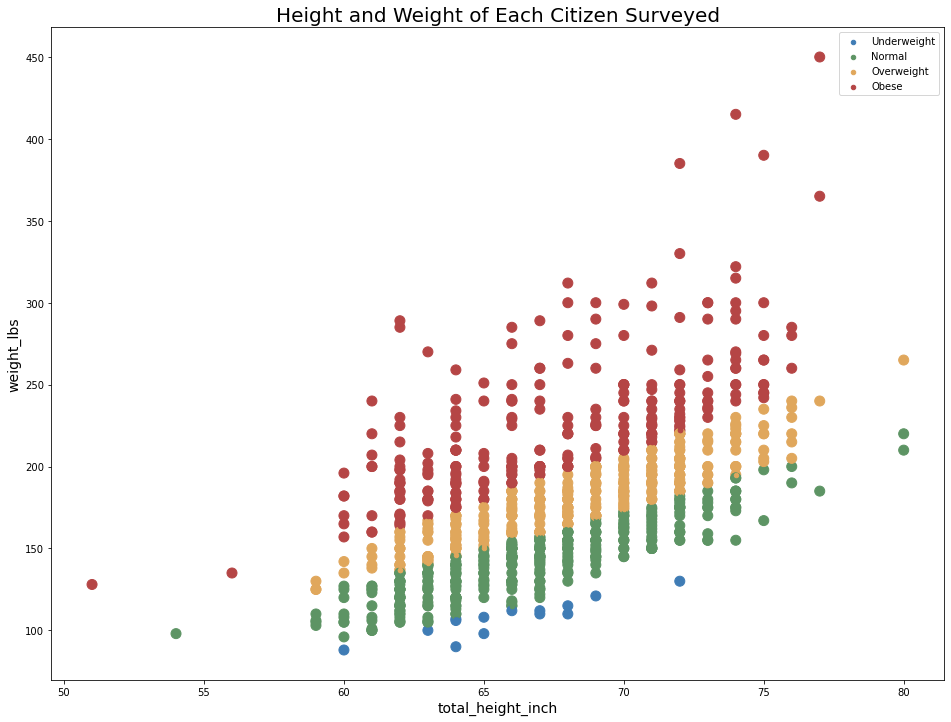

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize = (16,12))

colors = {'Underweight':'#3f7cb5', 'Normal':'#5d9464', 'Overweight':'#e0a75c', 'Obese':'#b54545'}


ax.scatter(bmi_df['total_height_inch'], bmi_df['weight_lbs'], c = bmi_df['bmi_range'].map(colors),s = 100,)

ax.set_title('Height and Weight of Each Citizen Surveyed', fontsize = 20)
ax.set_xlabel('Height (inches)', fontsize = 14)
ax.set_ylabel('Weight (lbs))', fontsize = 14)

grouped = bmi_df.groupby('bmi_range')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='total_height_inch', y='weight_lbs', label=key, color=colors[key])

plt.show()

